<a href="https://colab.research.google.com/github/EladSagiv/EladSagiv/blob/main/Mcl_project2_kickstar%2BRNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy
import math
import itertools
from sklearn.decomposition import PCA
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from google.colab import drive
import numpy as np
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split

In [3]:
# mounting google drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# import data

In [193]:
#upload data from my drive 
data = pd.read_excel(r"/content/gdrive/MyDrive/dataset-clb-final-project.xlsx")# the path to data
print(data)

                 id  launched_at  deadline  ...  data  iot       state
0      7.965543e+08      43560.0   43570.0  ...   0.0  0.0      failed
1      5.663813e+08      43557.0   43572.0  ...   0.0  0.0  successful
2      1.703023e+09      43553.0   43568.0  ...   0.0  0.0      failed
3      6.557162e+08      43550.0   43570.0  ...   0.0  0.0      failed
4      3.388981e+08      43550.0   43571.0  ...   0.0  0.0  successful
...             ...          ...       ...  ...   ...  ...         ...
17728  1.938168e+09      40058.0   40102.0  ...   0.0  0.0  successful
17729  1.451429e+09      40057.0   40087.0  ...   0.0  0.0  successful
17730  1.382536e+09      40002.0   40057.0  ...   0.0  0.0  successful
17731  3.540191e+08      39952.0   40008.0  ...   0.0  0.0  successful
17732  1.779215e+08      39932.0   39979.0  ...   0.0  0.0  successful

[17733 rows x 102 columns]


# EDA

In [194]:
data['you'].value_counts()

0.0    17402
1.0      319
2.0       11
`          1
Name: you, dtype: int64

In [195]:
data['you'] = data['you'].replace('`', 0)# convert sign (`) to int
data['you'] = data['you'].astype('int64')

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17733 entries, 0 to 17732
Columns: 102 entries, id to state
dtypes: float64(100), int64(1), object(1)
memory usage: 13.8+ MB


In [197]:
data.year.value_counts(normalize=True)
data.state.value_counts()


failed        11326
successful     6407
Name: state, dtype: int64

In [198]:
duplicates = data[data.duplicated(subset='id')]
print(f"Of the {len(data)} projects in the dataset, there are {len(data[data.duplicated(subset='id')])} which are listed more than once.")
print(f"Of these, {len(data[data.duplicated()])} have every value in common between duplicates.")

Of the 17733 projects in the dataset, there are 0 which are listed more than once.
Of these, 0 have every value in common between duplicates.


In [199]:
# cleaning empty colums from my data 
data=data.drop(columns=data.columns[data.eq(0).mean()>0.90])


In [200]:
data.describe()
data.shape

(17733, 9)

In [201]:
data.describe(include='object')

,state
count,17733
unique,2
top,failed
freq,11326


# Train Test Split

In [202]:
data.columns

Index(['id', 'launched_at', 'deadline', 'Duration', 'year', 'goal',
       'staff_pick', 'country', 'state'],
      dtype='object')

In [203]:
features = ['id', 'launched_at', 'deadline', 'Duration', 'year', 'goal',
       'staff_pick', 'country']
target= ['state']

In [25]:
# features = ['launched_at', 'deadline', 'Duration', 'year', 'goal', 'your', 'app',
#        '3d', 'smart', 'first', 'new world', 'system', 'new',  'social', 'you',
#        'mobile', 'printer', 'arduino', 'project', 'pi', 'wireless', 'platform',
#        'power', 'robot', 'light', 'phone', 'raspberry', 'home', 'online',
#        'most', 'kit', 'way', 'open', 'iphone', 'led', 'music', 'ultimate',
#        'help', 'control', 'digital', 'software', 'make', 'device', 'network',
#        'free', 'drone', 'one', 'best', 'video', 'learn', 'smartphone', 'space',
#        'portable', 'life', 'tool', 'source', 'personal', 'technology', 'easy',
#        'virtual', 'case', 'wearable', 'more', 'diy', 'bluetooth', 'affordable',
#        'audio', 'build', 'charger', 'made', 'android', 'my', 'watch', 'time',
#        'wifi', 'people', 'future', 'sound', 'controller', 'media', 'travel',
#        'robotics', 'water', 'get', 'pro', 'battery', 'better', 'next',
#        'reality', 'charging', 'computer', 'machine', 'solution', 'development',
#        'air', 'headphones', 'data', 'iot']
#target = ['state']


In [204]:
X = data[features]
y = data[target]

In [205]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=.3, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=.3, random_state=123)

In [206]:
X_train.head()


,id,launched_at,deadline,Duration,year,goal,staff_pick,country
15330,4.934378e+07,41960.0,41990.0,30.0,2014.0,10000.0,0.0,1.0
5038,1.605451e+09,42968.0,42998.0,30.0,2017.0,12600.0,0.0,0.0
11557,1.803310e+09,42327.0,42357.0,30.0,2015.0,20000.0,1.0,1.0
9235,1.385126e+09,42565.0,42603.0,38.0,2016.0,50000.0,0.0,1.0
11107,3.361091e+08,42378.0,42408.0,30.0,2016.0,35000.0,0.0,1.0


In [207]:
X_test.head(5)

,id,launched_at,deadline,Duration,year,goal,staff_pick,country
579,1.070287e+09,43439.0,43469.0,30.0,2018.0,100000.0,0.0,1.0
1632,1.032523e+09,43312.0,43357.0,45.0,2018.0,70000.0,0.0,1.0
12983,5.922226e+08,42209.0,42239.0,30.0,2015.0,5000.0,0.0,1.0
10874,1.921944e+09,42402.0,42432.0,30.0,2016.0,25000.0,0.0,0.0
16205,6.556193e+08,41845.0,41875.0,30.0,2014.0,2500.0,0.0,1.0


In [208]:
X_train.shape

(8689, 8)

#Normaliztion data




In [210]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [211]:
pca = PCA().fit(X_train)
X_train = pca.transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)

In [ ]:
y_train = pd.get_dummies(y_train)
y_val = pd.get_dummies(y_val)
y_test = pd.get_dummies(y_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

#Build model 

In [212]:

model = keras.Sequential([
                          keras.Input(shape=(8,)),
                     
                          
                          keras.layers.Dense(200, activation='relu'),
                          keras.layers.Dropout(.3),
                          keras.layers.Dense(80, activation='relu'),
                          keras.layers.Flatten(),
                          keras.layers.Dense(2, activation=tf.keras.activations.softmax)
])
model.summary()
batch_size = 100
epochs = 50
metrics = ['acc', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
model.compile(tf.optimizers.Adam(learning_rate=0.01),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=metrics)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 200)               1800      
                                                                 
 dropout_11 (Dropout)        (None, 200)               0         
                                                                 
 dense_37 (Dense)            (None, 80)                16080     
                                                                 
 flatten_11 (Flatten)        (None, 80)                0         
                                                                 
 dense_38 (Dense)            (None, 2)                 162       
                                                                 
Total params: 18,042
Trainable params: 18,042
Non-trainable params: 0
_________________________________________________________________


In [215]:
history = model.fit(X_train, y_train, 
          batch_size = batch_size,
          epochs = epochs,
          validation_data=(X_val, y_val))
 #

Epoch 1/50
87/87 [==============================] - 1s 7ms/step - loss: 0.5628 - acc: 0.7373 - precision_12: 0.7373 - recall_12: 0.7373 - val_loss: 0.5287 - val_acc: 0.7551 - val_precision_12: 0.7551 - val_recall_12: 0.7551
Epoch 2/50
87/87 [==============================] - 0s 4ms/step - loss: 0.5445 - acc: 0.7477 - precision_12: 0.7477 - recall_12: 0.7477 - val_loss: 0.5260 - val_acc: 0.7578 - val_precision_12: 0.7578 - val_recall_12: 0.7578
Epoch 3/50
87/87 [==============================] - 0s 3ms/step - loss: 0.5382 - acc: 0.7475 - precision_12: 0.7475 - recall_12: 0.7475 - val_loss: 0.5235 - val_acc: 0.7551 - val_precision_12: 0.7551 - val_recall_12: 0.7551
Epoch 4/50
87/87 [==============================] - 0s 3ms/step - loss: 0.5364 - acc: 0.7485 - precision_12: 0.7485 - recall_12: 0.7485 - val_loss: 0.5223 - val_acc: 0.7591 - val_precision_12: 0.7591 - val_recall_12: 0.7591
Epoch 5/50
87/87 [==============================] - 0s 3ms/step - loss: 0.5357 - acc: 0.7467 - precision

In [216]:
score_val = model.evaluate(X_val, y_val)
score_test = model.evaluate(X_test, y_test)

167/167 [==============================] - 0s 1ms/step - loss: 0.5280 - acc: 0.7519 - precision_12: 0.7519 - recall_12: 0.7519


In [235]:
results = {'Precision sucsess':[score_val[2], score_test[2]], 'Recall':[score_val[3], score_test[3]], 'accuracy':[score_val[1], score_test[1]],'loss':[score_val[0],score_test[0]]}
results = pd.DataFrame(results, index=['Valdition', 'Test'])
results


,Precision sucsess,Recall,accuracy,loss
Valdition,0.761278,0.761278,0.761278,0.508800
Test,0.751880,0.751880,0.751880,0.527977


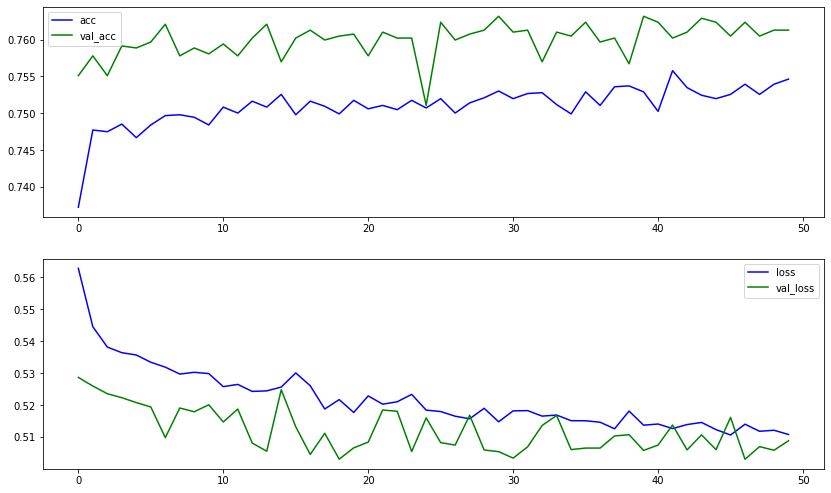

In [236]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(14,8.5))


ax[0].plot(history.history['acc'], color='blue')
ax[0].plot(history.history['val_acc'], color='green')
ax[0].legend(['acc','val_acc']) #

ax[1].plot(history.history['loss'], color='blue')
ax[1].plot(history.history['val_loss'], color='green')
ax[1].legend(['loss','val_loss']) #

In [237]:

model = keras.Sequential([
                          keras.Input(shape=(8,)),
                       
                          
                          keras.layers.Dense(200, activation='sigmoid'),
                          # keras.layers.Dropout(.3),
                          keras.layers.Dense(80, activation='sigmoid'),
                          keras.layers.Flatten(),
                          keras.layers.Dense(2, activation=tf.keras.activations.softmax)
])
model.summary()
batch_size = 100
epochs = 50
metrics = ['acc', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
model.compile(tf.optimizers.Adam(learning_rate=0.1),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=metrics)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 200)               1800      
                                                                 
 dense_43 (Dense)            (None, 80)                16080     
                                                                 
 flatten_13 (Flatten)        (None, 80)                0         
                                                                 
 dense_44 (Dense)            (None, 2)                 162       
                                                                 
Total params: 18,042
Trainable params: 18,042
Non-trainable params: 0
_________________________________________________________________


In [238]:
history = model.fit(X_train, y_train, 
          batch_size = batch_size,
          epochs = epochs,
          validation_data=(X_val, y_val))
 #

Epoch 1/50
87/87 [==============================] - 1s 6ms/step - loss: 0.8995 - acc: 0.5720 - precision_14: 0.5720 - recall_14: 0.5720 - val_loss: 0.6540 - val_acc: 0.6391 - val_precision_14: 0.6391 - val_recall_14: 0.6391
Epoch 2/50
87/87 [==============================] - 0s 3ms/step - loss: 0.6806 - acc: 0.6090 - precision_14: 0.6090 - recall_14: 0.6090 - val_loss: 0.6616 - val_acc: 0.6391 - val_precision_14: 0.6391 - val_recall_14: 0.6391
Epoch 3/50
87/87 [==============================] - 0s 3ms/step - loss: 0.6792 - acc: 0.6120 - precision_14: 0.6120 - recall_14: 0.6120 - val_loss: 0.6773 - val_acc: 0.6391 - val_precision_14: 0.6391 - val_recall_14: 0.6391
Epoch 4/50
87/87 [==============================] - 0s 3ms/step - loss: 0.6933 - acc: 0.5948 - precision_14: 0.5948 - recall_14: 0.5948 - val_loss: 0.7800 - val_acc: 0.6391 - val_precision_14: 0.6391 - val_recall_14: 0.6391
Epoch 5/50
87/87 [==============================] - 0s 3ms/step - loss: 0.7028 - acc: 0.5890 - precision

In [239]:
score_val = model.evaluate(X_val, y_val)
score_test = model.evaluate(X_test, y_test)


167/167 [==============================] - 0s 1ms/step - loss: 0.6650 - acc: 0.6425 - precision_14: 0.6425 - recall_14: 0.6425


In [240]:
results = {'Precision sucsess':[score_val[2], score_test[2]], 'Recall':[score_val[3], score_test[3]], 'accuracy':[score_val[1], score_test[1]],'loss':[score_val[0],score_test[0]]}
results = pd.DataFrame(results, index=['Valdition', 'Test'])
results


,Precision sucsess,Recall,accuracy,loss
Valdition,0.639098,0.639098,0.639098,0.668098
Test,0.642481,0.642481,0.642481,0.664956


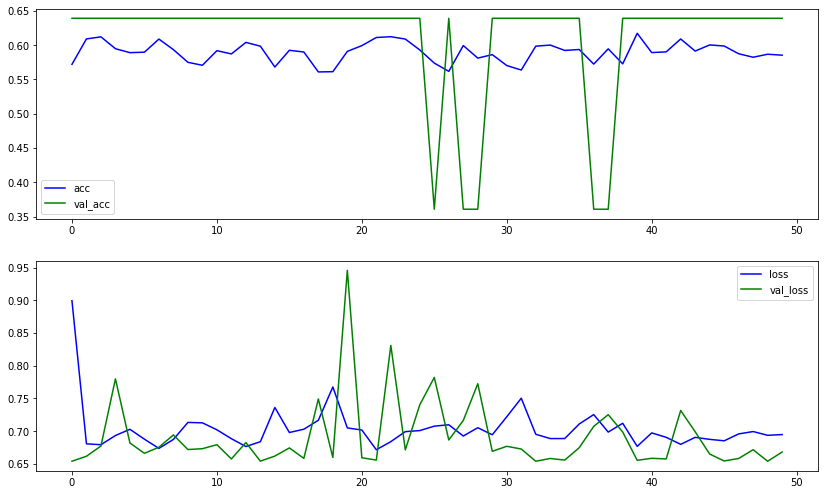

In [241]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(14,8.5))


ax[0].plot(history.history['acc'], color='blue')
ax[0].plot(history.history['val_acc'], color='green')
ax[0].legend(['acc','val_acc']) #

ax[1].plot(history.history['loss'], color='blue')
ax[1].plot(history.history['val_loss'], color='green')
ax[1].legend(['loss','val_loss']) #

In [242]:

model = keras.Sequential([
                          keras.Input(shape=(8,)),
                       
                          
                          keras.layers.Dense(100, activation='sigmoid'),
                          keras.layers.Dropout(.3),
                          keras.layers.Dense(90, activation='sigmoid'),
                          keras.layers.Flatten(),
                          keras.layers.Dense(2, activation=tf.keras.activations.softmax)
])
model.summary()
batch_size = 100
epochs = 50
metrics = ['acc', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
model.compile(tf.optimizers.SGD(learning_rate=0.01),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=metrics)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 100)               900       
                                                                 
 dropout_12 (Dropout)        (None, 100)               0         
                                                                 
 dense_46 (Dense)            (None, 90)                9090      
                                                                 
 flatten_14 (Flatten)        (None, 90)                0         
                                                                 
 dense_47 (Dense)            (None, 2)                 182       
                                                                 
Total params: 10,172
Trainable params: 10,172
Non-trainable params: 0
_________________________________________________________________


In [243]:
history = model.fit(X_train, y_train, 
          batch_size = batch_size,
          epochs = epochs,
          validation_data=(X_val, y_val))
 #

Epoch 1/50
87/87 [==============================] - 1s 10ms/step - loss: 0.6515 - acc: 0.6362 - precision_15: 0.6362 - recall_15: 0.6362 - val_loss: 0.6440 - val_acc: 0.6391 - val_precision_15: 0.6391 - val_recall_15: 0.6391
Epoch 2/50
87/87 [==============================] - 0s 5ms/step - loss: 0.6485 - acc: 0.6368 - precision_15: 0.6368 - recall_15: 0.6368 - val_loss: 0.6414 - val_acc: 0.6391 - val_precision_15: 0.6391 - val_recall_15: 0.6391
Epoch 3/50
87/87 [==============================] - 0s 5ms/step - loss: 0.6465 - acc: 0.6377 - precision_15: 0.6377 - recall_15: 0.6377 - val_loss: 0.6393 - val_acc: 0.6391 - val_precision_15: 0.6391 - val_recall_15: 0.6391
Epoch 4/50
87/87 [==============================] - 1s 6ms/step - loss: 0.6443 - acc: 0.6382 - precision_15: 0.6382 - recall_15: 0.6382 - val_loss: 0.6365 - val_acc: 0.6391 - val_precision_15: 0.6391 - val_recall_15: 0.6391
Epoch 5/50
87/87 [==============================] - 1s 6ms/step - loss: 0.6433 - acc: 0.6378 - precisio

In [244]:
score_val = model.evaluate(X_val, y_val)
score_test = model.evaluate(X_test, y_test)


167/167 [==============================] - 0s 1ms/step - loss: 0.5769 - acc: 0.7451 - precision_15: 0.7451 - recall_15: 0.7451


In [245]:
results = {'Precision sucsess':[score_val[2], score_test[2]], 'Recall':[score_val[3], score_test[3]], 'accuracy':[score_val[1], score_test[1]],'loss':[score_val[0],score_test[0]]}
results = pd.DataFrame(results, index=['Valdition', 'Test'])
results


,Precision sucsess,Recall,accuracy,loss
Valdition,0.755639,0.755639,0.755639,0.571845
Test,0.745113,0.745113,0.745113,0.576893


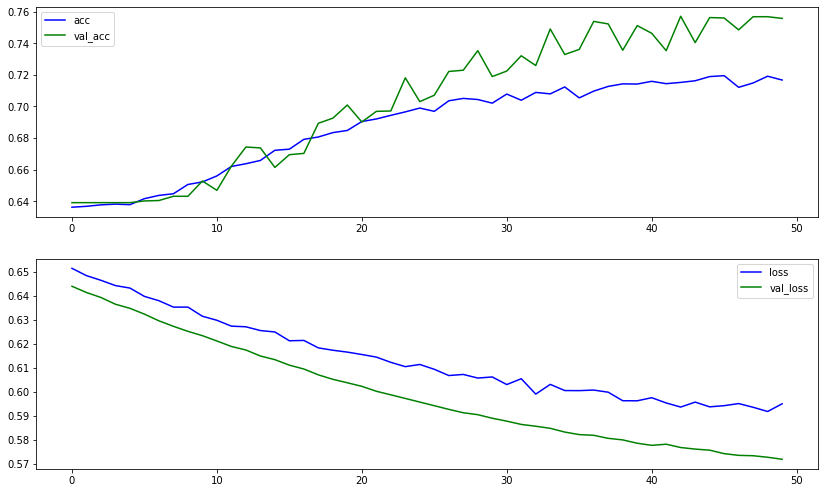

In [246]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(14,8.5))


ax[0].plot(history.history['acc'], color='blue')
ax[0].plot(history.history['val_acc'], color='green')
ax[0].legend(['acc','val_acc']) #

ax[1].plot(history.history['loss'], color='blue')
ax[1].plot(history.history['val_loss'], color='green')
ax[1].legend(['loss','val_loss']) #